In [2]:
import qiskit
import qc_grader
print(f"Qiskit version: {qiskit.__version__}")
print(f"Grader version: {qc_grader.__version__}")

Qiskit version: 2.0.3
Grader version: 0.22.9


In [3]:
from qiskit_ibm_runtime import QiskitRuntimeService


service = QiskitRuntimeService(name="qgss-2025")
service.saved_accounts()

{'qgss-2025': {'channel': 'ibm_quantum_platform',
  'url': 'https://cloud.ibm.com',
  'token': 'ADFb-APS7NyXEuF1oYeE4gpAjqv9QVL8hhAfQf_DXA7Z',
  'instance': 'crn:v1:bluemix:public:quantum-computing:us-east:a/6a55fc6b738a452a933f960e369151de:0cd85471-8b39-4e6c-8dcc-c31993ffc9e3::',
  'verify': True,
  'private_endpoint': False}}

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from PIL import Image
import io

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit import Parameter
from qiskit.visualization import plot_histogram, plot_distribution
from qiskit_ibm_runtime import Options, Session, SamplerV2 as Sampler
from qiskit.result import marginal_distribution

from qiskit.transpiler import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit_aer import AerSimulator

from qc_grader.challenges.qgss_2025 import (
    grade_lab1_ex1_1, 
    grade_lab1_ex1_2, 
    grade_lab1_ex1_3, 
    grade_lab1_ex1_4, 
    grade_lab1_ex2, 
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6
)

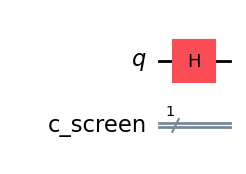

In [4]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister

qr = QuantumRegister(1,name="q")
cr = ClassicalRegister(1,name = "c_screen")

double_slit_exp = QuantumCircuit(qr,cr)

double_slit_exp.h(qr)
# double_slit_exp.measure(0,0)

double_slit_exp.draw('mpl')

In [5]:
grade_lab1_ex1_1(double_slit_exp)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


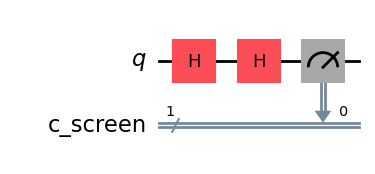

In [6]:
qr = QuantumRegister(1,name="q")
cr = ClassicalRegister(1,name = "c_screen")

double_slit_exp = QuantumCircuit(qr,cr)

double_slit_exp.h(qr)
double_slit_exp.h(qr)
double_slit_exp.measure(qr[0],cr[0])

double_slit_exp.draw('mpl')

In [8]:
grade_lab1_ex1_2(double_slit_exp)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


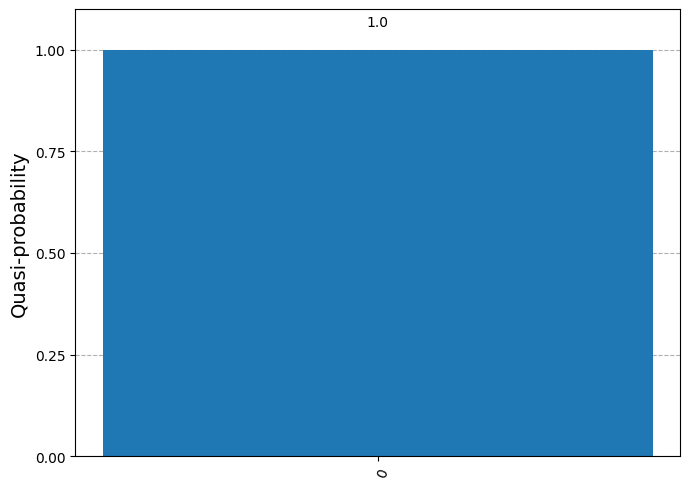

In [9]:
backend = AerSimulator()

pm = generate_preset_pass_manager(backend=backend,optimization_level=3)
qc_isa = pm.run(double_slit_exp)

sampler = Sampler(mode = backend)
job = sampler.run([qc_isa],shots = 10000)
result = job.result()
counts = result[0].data.c_screen.get_counts()

plot_distribution(counts)

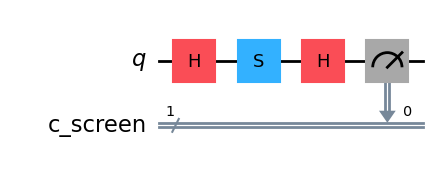

In [10]:
qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_with_difference = QuantumCircuit(qr, cr)
double_slit_with_difference.h(0)

#your code here
double_slit_with_difference.s(0)

#end of your code

double_slit_with_difference.h(0)
double_slit_with_difference.measure(qr[0], cr[0])
double_slit_with_difference.draw('mpl')

In [11]:
grade_lab1_ex1_3(double_slit_with_difference)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


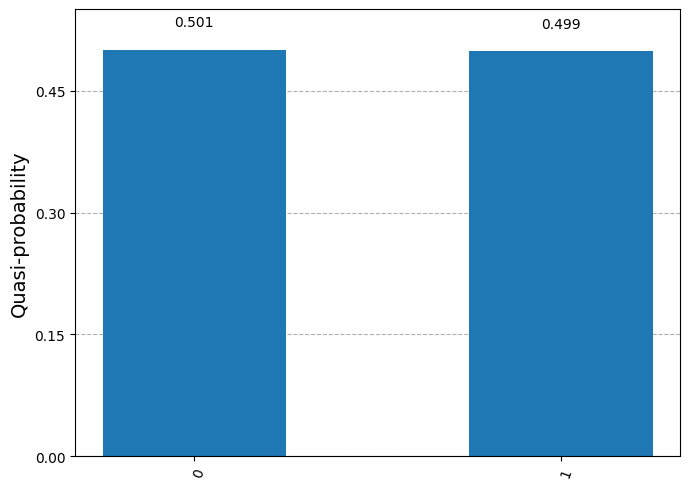

In [12]:
qc_isa = pm.run(double_slit_with_difference)

sampler = Sampler(mode = backend)
job = sampler.run([qc_isa],shots=10000)
result = job.result()

count = result[0].data.c_screen.get_counts()

plot_distribution(count)

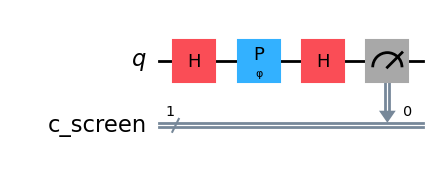

In [13]:
phi = Parameter('φ')

qr = QuantumRegister(1, name='q')
cr = ClassicalRegister(1, name='c_screen')

double_slit_fringe = QuantumCircuit(qr, cr)

#your code here
double_slit_fringe.h(0)
double_slit_fringe.p(phi,qr[0])
double_slit_fringe.h(0)
double_slit_fringe.measure(qr[0],cr[0])

#end of your code

double_slit_fringe.draw('mpl')

In [14]:
grade_lab1_ex1_4(double_slit_fringe)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


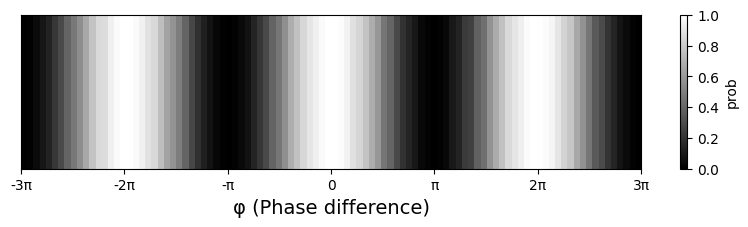

In [15]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_fringe)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=1000).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

In [16]:
def schrodingers_cat_experiment_theta(theta):
    
    qc = QuantumCircuit(1)

    #your code start here
    qc.rx(theta,0)

    
    #end of your code

    qc.measure_all()
    
    backend = AerSimulator()
    pm = generate_preset_pass_manager( backend = backend, optimization_level=3)
    qc_isa = pm.run(qc)

    # Circuit compile and run, shot = 1 
    sampler = Sampler(mode=backend)
    counts = sampler.run([qc_isa], shots = 1).result()[0].data.meas.get_counts()

    measured_state = list(counts.keys())[0] if counts else '0'  # bring measured result

    if measured_state == '0':
        cat_happy = True
    else:
        cat_happy = False

    return cat_happy, qc

In [17]:
grade_lab1_ex2(schrodingers_cat_experiment_theta)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


In [18]:
out = widgets.Output()

slider = widgets.FloatSlider(
    value=0,
    min=0,
    max=2*np.pi,
    step=0.01,
    description='θ',
    continuous_update=True
)

button = widgets.Button(
    description='Open the Box',
    button_style='success'
)
    
def on_button_click(b):
    with out:
        out.clear_output(wait=True)  # clean output

        result = schrodingers_cat_experiment_theta(slider.value)[0]

        if result==True:
            txt = "happy"
        else:
            txt = "grumpy"

    
        probability = int(np.cos(slider.value/2)**2 * 100)

        display(f"The probability of cat is happy: {probability}%")
        display(f"The observed cat is : {txt}")

button.on_click(on_button_click)

display(slider, button, out)

FloatSlider(value=0.0, description='θ', max=6.283185307179586, step=0.01)

Button(button_style='success', description='Open the Box', style=ButtonStyle())

Output()

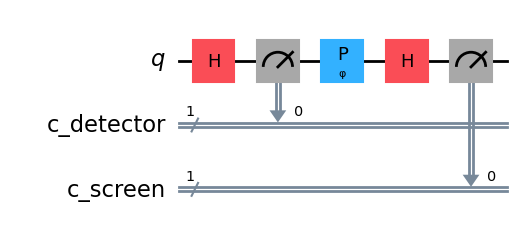

In [19]:
# Registers
qr = QuantumRegister(1, name='q')
cr1 = ClassicalRegister(1, name='c_detector')
cr2 = ClassicalRegister(1, name='c_screen')

# Create quantum circuit
double_slit_with_detector = QuantumCircuit(qr, cr1, cr2)

# Define the phase parameter
phi = Parameter('φ')

# Build the circuit
double_slit_with_detector.h(qr[0])                         # Create superposition (simulate slits)
double_slit_with_detector.measure(qr[0], cr1[0])           # Detector measurement (which-path)
double_slit_with_detector.p(phi, qr[0])                    # Apply variable phase shift
double_slit_with_detector.h(qr[0])                         # Interference at screen
double_slit_with_detector.measure(qr[0], cr2[0])           # Final screen measurement

# Draw the circuit
double_slit_with_detector.draw('mpl')


In [20]:
grade_lab1_ex3(double_slit_with_detector)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


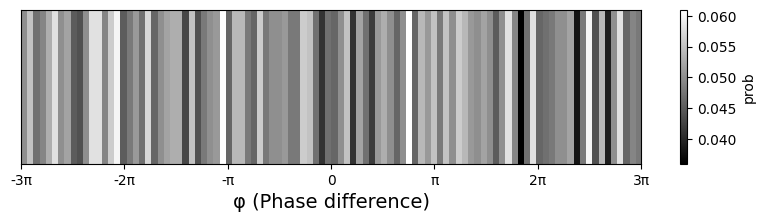

In [21]:
φ_lst = np.linspace(-3*np.pi, 3*np.pi, 100)
qc_isa = pm.run(double_slit_with_detector)

φ_hit = []
dist = sampler.run([(qc_isa, φ_lst)], shots=100).result()[0].data.c_screen

for i  in range(len(φ_lst)):
    result = dist[i].get_counts()
    if '0' in result:
        φ_hit.append(result['0']/1000)
    else:
        φ_hit.append(0)

#plot heat map
φ_hit_2d = np.array(φ_hit).reshape(1, -1)

plt.figure(figsize=(10, 2))
plt.imshow(φ_hit_2d, cmap='gray', aspect='auto', extent=[-3*np.pi, 3*np.pi, 0, 0.1])

plt.xlabel('φ (Phase difference)', fontsize=14)
plt.colorbar(label='prob')
plt.xticks(ticks=[-3*np.pi, -2*np.pi, -np.pi, 0, np.pi, 2*np.pi, 3*np.pi],
           labels=['-3π', '-2π', '-π', '0', 'π', '2π', '3π'])
plt.yticks([])  
plt.show()

Full Teleportation Circuit (Check your Exercises 1, 2, 3):


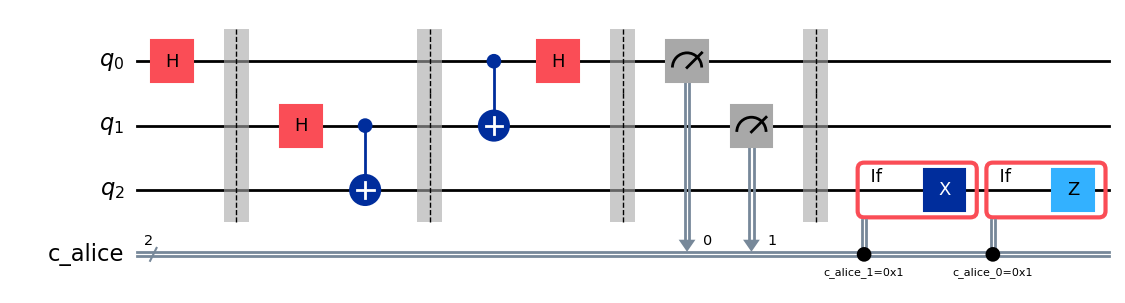

In [12]:
# Define quantum and classical registers
qr_tele = QuantumRegister(3, name='q')
cr_alice_tele = ClassicalRegister(2, name='c_alice') # For Alice's measurements

# For verification with statevector, we don't measure Bob's final qubit in this circuit.
# If we were to run on hardware and verify by counts, we'd add a classical bit for Bob.
teleport_qc = QuantumCircuit(qr_tele, cr_alice_tele, name='Teleportation')

# Prepare Alice's message state |ψ> = |+> on q0
teleport_qc.h(qr_tele[0])
teleport_qc.barrier()

# ---- TODO : Task 1 ---
# Step 1: Create Bell pair between q1 (Alice) and q2 (Bob)
teleport_qc.h(qr_tele[1])
teleport_qc.cx(qr_tele[1],qr_tele[2])



# --- End of TODO --
teleport_qc.barrier()

# ---- TODO : Task 2 ---
# Step 2: Alice's Bell Measurement (gates part))
teleport_qc.cx(qr_tele[0],qr_tele[1])
teleport_qc.h(qr_tele[0])



# --- End of TODO --
teleport_qc.barrier()

# Alice measures her qubits q0 and q1
teleport_qc.measure(qr_tele[0], cr_alice_tele[0]) # q0 -> c0
teleport_qc.measure(qr_tele[1], cr_alice_tele[1]) # q1 -> c1
teleport_qc.barrier()

# ---- TODO : Task 3 ---
# Step 3: Bob's Conditional Corrections on q2
with teleport_qc.if_test((cr_alice_tele[1],1)):
    teleport_qc.x(qr_tele[2])

with teleport_qc.if_test((cr_alice_tele[0],1)):
    teleport_qc.z(qr_tele[2])

# teleport_qc.cx(qr_tele[1],qr_tele[2])
# teleport_qc.cz(qr_tele[0],qr_tele[2])

# --- End of TODO --

print("Full Teleportation Circuit (Check your Exercises 1, 2, 3):")
display(teleport_qc.draw('mpl'))

In [13]:
grade_lab1_ex6(teleport_qc)

Submitting your answer. Please wait...
Congratulations! 🎉 Your answer is correct.


Using statevector simulator...
Running statevector simulation...
Simulation successful.
Statevector retrieved successfully.

Visualizing final qubit states (q2 should match initial q0 state |+>):


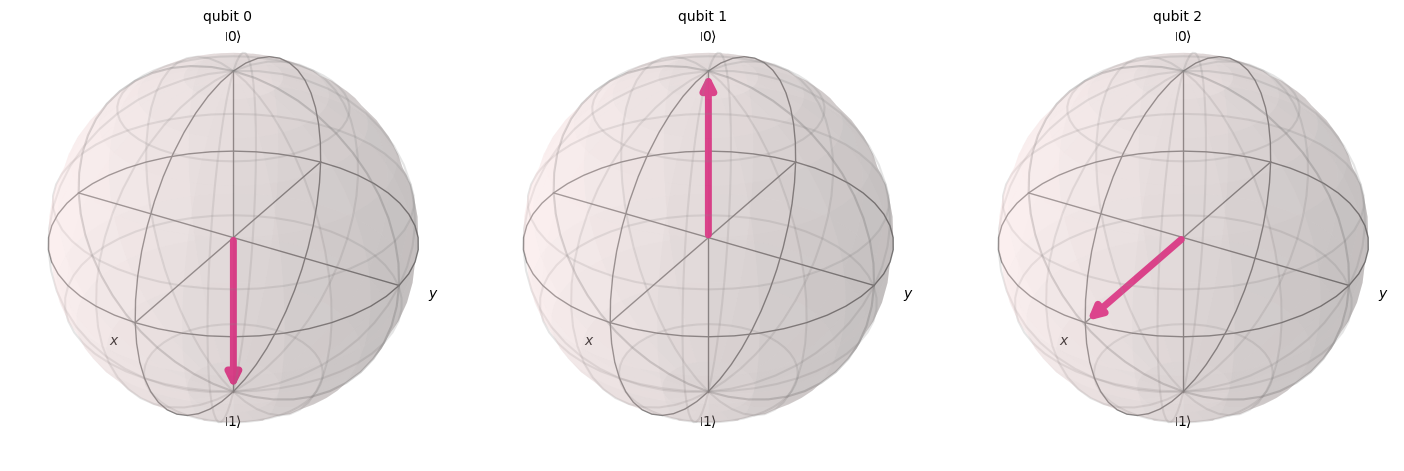

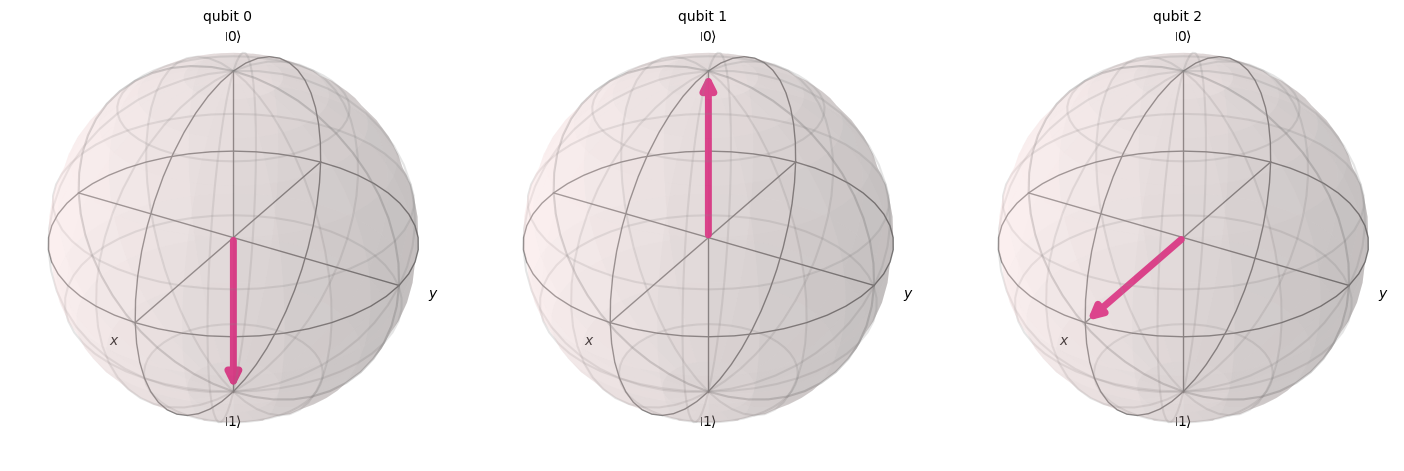

In [16]:
%matplotlib inline
from qiskit.visualization import plot_bloch_multivector
# Use Statevector Simulator
print("Using statevector simulator...")
sv_simulator = AerSimulator(method='statevector') # Explicitly set method for clarity
teleport_qc_sv = teleport_qc.copy() # Work with a copy for statevector simulation
teleport_qc_sv.save_statevector() # Save statevector at the end

print("Running statevector simulation...")
job_sv = sv_simulator.run(teleport_qc_sv) # shots=1 is default for statevector
result_sv = job_sv.result()

if result_sv.success:
    print("Simulation successful.")
    final_statevector = result_sv.get_statevector()
    print("Statevector retrieved successfully.")
    print("\nVisualizing final qubit states (q2 should match initial q0 state |+>):")
    # q0 was |+> (points along +X). After teleportation, q2 should be |+>.
    # q0 and q1 states are after Alice's measurement, so they'll be collapsed.
    
    display(plot_bloch_multivector(final_statevector)) #TODO, use plot_bloch_multivector to plot final_state
        
else:
    print(f"Statevector simulation failed! Status: {result_sv.status}")

In [17]:
from qc_grader.grader.grade import check_lab_completion_status
check_lab_completion_status("qgss_2025")

Lab 0: 2/2 exercises completed (100%)
    ✅ 1300 participants have completed this lab
Lab 1: 9/9 exercises completed (100%)
    ✅ 329 participants have completed this lab
Lab 2: 0/7 exercises completed (0%)
    ✅ 1 participants have completed this lab
Lab 3: 0/5 exercises completed (0%)
    ✅ 0 participants have completed this lab
Lab 4: 0/6 exercises completed (0%)
    ✅ 0 participants have completed this lab
